<a href="https://colab.research.google.com/github/swbrock/GitFun/blob/master/MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [5]:
# Question 6: Download the StudentsPerformance.csv dataset that is provided with this exam. 
# Import it into a DataFrame. Print a list of column names and their associated data types. 
# Which columns would make sense to predict as a label in an MLR?

import pandas as pd


df = pd.read_csv('StudentsPerformance.csv') 
for col in df:
  print (df[col].name)
  print(df[col].dtype)
  print("")

gender
object

race/ethnicity
object

parental level of education
object

lunch
object

test preparation course
object

math score
int64

reading score
int64

writing score
int64



In [6]:
# Question 7: Drop any rows that contain null values in any column using .dropna(). 
# Use the statsmodels package to create an MLR/OLS model to predict math score as a function of the reading score and 
# writing score. Do not split the data; use the entire dataset for training. Allow the y-intercept to vary.

# Which feature best predicts their math score?
import numpy as np
import statsmodels.api as sm
from  matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import scipy as sp
from sklearn import preprocessing
from datetime import datetime 
df.dropna()
df_original = df
df = df.assign(const = 1)
x = df[['reading score','const']] 
# SET Y
y = df['math score']
# RUN MODEL
model = sm.OLS(y,x).fit()
print(model.summary())

x = df[['writing score','const']] 
# SET Y
y = df['math score']
# RUN MODEL
model = sm.OLS(y,x).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2012.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.79e-241
Time:                        06:15:06   Log-Likelihood:                -3585.3
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     998   BIC:                             7184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
reading score     0.8491      0.019     44.855

In [7]:
# Question 8: In the original DataFrame convert each of the non-numeric features into dummy codes. 
# Generate an OLS/MLR model (using the statsmodels package) to predict math score. 
# However, do not include either reading score or writing score as features; only include those dummy codes created from the 
# categorical features. Do not split the data; use the entire dataset for training. Print the results summary.

# Do test preparation courses improve math scores?

label = 'math score'
df = df.drop(columns=['writing score', 'reading score', 'const'])
for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

      # Set label and features
y = df[label]
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=[label])

      # Run the multiple linear regression model
model_math = sm.OLS(y, X)
results = model_math.fit()
print(results.summary())  # View results




                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.62e-55
Time:                        06:15:09   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [8]:
# Question 9: Generate OLS/MLR models to predict writing scores and reading scores using the same set of features. Similarly, drop the other two score features from each score model you create. For example, predict reading score, but do not include math score or writing score as features. Do not split the data; use the entire dataset for training. Print the results of each model summary. 

# Which score (reading, writing, or math) is most accurately predicted?

df_reading = df_original
label = 'reading score'
df_reading = df_reading.drop(columns=['math score', 'writing score'])
for col in df_reading:
    if not pd.api.types.is_numeric_dtype(df_reading[col]):
        df_reading = pd.get_dummies(df_reading, columns=[col], prefix=col, drop_first=True)

      # Set label and features
y = df_reading[label]
X = df_reading.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=[label])

      # Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

df_writing = df_original
label = 'writing score'
df_writing = df_writing.drop(columns=['math score', 'reading score'])
for col in df_writing:
    if not pd.api.types.is_numeric_dtype(df_writing[col]):
        df_writing = pd.get_dummies(df_writing, columns=[col], prefix=col, drop_first=True)

      # Set label and features
y = df_writing[label]
X = df_writing.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=[label])

      # Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.62e-48
Time:                        06:15:13   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [11]:
# Question 10: Using the last model you created to predict math score (which includes all of the dummy codes), 
# what is the predicted math score of a child who is female, race/ethnicity_group C, parental level of education_some college, 
# gets a reduced lunch, and has not taken a test preparation course? Print the predicted value.
new_input = [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
print(model.predict(new_input))


[1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 2 2 1 1 2 1 1 2
 3 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 3 2 3 1 1 1 2 2 1 2
 2 1 2 1 3 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 1 2 1 1 2 2
 1 1 2 1 1 1 2 3 1 1 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 1 2 3 1 1 1 2 1 2 1
 2 1 2 1 1 2 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 3 1 1 1 2 2
 1 1 3 2 1 1 2 2 2 1 2 2 1 1 1 1 2 1 1 1 3 1 1 1 1 3 1 1 1 1 2 1 1 1 2 2 1
 2 3 1 1 1 2 2 1 2 1 1 2 1 2 2 3 1 1 2 1 2 1 3 1 1 1 1 1 2 2 2 2 2 1 1 1 1
 1 2 1 2 1 2 3 1 2 2 1 1 1 2 2 1 1 2 1 2 1 2 2 2 2 2 1 1 2 1 2 1 3 2 1 2 1
 2 1 1 2 1 3 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 3 1 2 3 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 3 1 1 1 1 2 3
 1 1 3 2 2 1 3 2 2 1 1 1 1 2 2 1 1 1 2 2 2 2 1 1 2 1 1 1 2 3 2 1 1 2 1 2 1
 1 2 2 2 1 2 2 1 1 1 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 1 2 2 1 2 2 1 3 1 2 2 1
 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 2 1 2 2 1 1
 2 1 1 1 1 2 1 2 1 1 1 1 

In [12]:
#  Question 15: Import all needed packages for classification modeling, splitting the data, and calculating fit metrics. 
# Import the Lending Club dataset found at: http://www.ishelp.info/data/lc_xs.csv. Alternatively, if the server is down, you 
# can also download this data file from the MyEducator assignment description. 

# How many records are in the dataset?
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

df = pd.read_csv('lc_xs (1).csv')
print (len(df))


20951


In [13]:
# Question 16: Run the code below. If you named your DataFrame something other than 'df', then be sure to change 'df' to 
# whatever your DataFrame is named before running the code.

# Based on the results, do you believe that Lending Club is doing a decent job of determining who will pay back their loans?

df['loan_status'].value_counts()

Current               13268
Fully Paid             5484
Charged Off            1708
Late (31-120 days)      313
In Grace Period         106
Late (16-30 days)        72
Name: loan_status, dtype: int64

In [14]:
# QUESTION 17: Drop the features: loan_status_numeric, issue_d, title, emp_title, emp_length, earliest_cr_line, 
#  mths_since_last_delinq, mths_since_last_record, sub_grade. Pseudocode:

#      df.drop(columns=[name, name, ..., name], inplace=True)

df.drop(columns=['loan_status_numeric', 'issue_d', 'title', 'emp_title', 'emp_length', 'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'sub_grade'], inplace=True)

# Since customers who are Current, In Grace Period, Late (16-30 days), and Late (31-120 days) have not finished their loan, 
# drop all records except for those which are Fully Paid or Charged Off. Pseudocode: 

#      df.loc[(df['column_name'] == A) | (df['column_name'] == B)]
df.drop(df.loc[(df['loan_status'] == "Current") | (df['loan_status'] == "In Grace Period") | (df['loan_status'] == "Late (16-30 days)") | (df['loan_status'] == "Late (31-120 days)")].index, inplace=True)
# Drop any rows containing null data using the command: df.dropna(inplace=True). 
df.dropna(inplace=True)
# Finally, create dummy codes for all remaining categorical features (but not for the label loan_status)
df = pd.get_dummies(df, columns=["term", "home_ownership", "verification_status", "grade"], drop_first=True)
print (df.head(5))
#Print out the first five records of the resulting DataFrame. How many columns are left after completing each of these tasks?



    loan_status  loan_amnt  int_rate  installment  total_pymnt  \
1   Charged Off       8000      8.39       252.14   5384.79000   
2   Charged Off      35000     18.45       897.37   2763.86000   
3    Fully Paid      15000     11.39       493.86  15762.91275   
6    Fully Paid      27250     17.27       975.21  27961.44000   
10  Charged Off      30000      9.44       629.18  10403.60000   

    total_rec_prncp  total_rec_int  total_rec_late_fee             purpose  \
1           3749.64         785.15                 0.0  debt_consolidation   
2           1094.39        1669.47                 0.0  debt_consolidation   
3          15000.00         762.91                 0.0  debt_consolidation   
6          27250.00         711.44                 0.0               other   
10          4499.17        2406.08                 0.0      small_business   

    annual_inc  ...  home_ownership_OWN  home_ownership_RENT  \
1      59000.0  ...                   0                    1   
2     

In [15]:
# Question 18: Set the y and X datasets assuming that loan_status will be the label. Print the first 5 records of X

y  = df['loan_status']
X = df.drop(columns=['loan_status'])
X = pd.get_dummies(X,drop_first=True)

print (X.head())

    loan_amnt  int_rate  installment  total_pymnt  total_rec_prncp  \
1        8000      8.39       252.14   5384.79000          3749.64   
2       35000     18.45       897.37   2763.86000          1094.39   
3       15000     11.39       493.86  15762.91275         15000.00   
6       27250     17.27       975.21  27961.44000         27250.00   
10      30000      9.44       629.18  10403.60000          4499.17   

    total_rec_int  total_rec_late_fee  annual_inc  acc_now_delinq  \
1          785.15                 0.0     59000.0               0   
2         1669.47                 0.0     50000.0               0   
3          762.91                 0.0     98000.0               0   
6          711.44                 0.0    120000.0               0   
10        2406.08                 0.0     60000.0               0   

    delinq_2yrs  ...  purpose_debt_consolidation  purpose_home_improvement  \
1             0  ...                           1                         0   
2       

In [16]:
# Question 19: Split the data using a 50/50 split and random seed = 12345

# Next, train a Decision Tree Classifier model using a random_state=12345 and fit the model with the appropriate data set

# Print the Accuracy score using either the .accuracy_score() or .score() method of the Decision Tree Classifier model object. 
# Be sure to pass in the appropriate data into those objects. What is that score? Copy and paste the entire number with all 
# decimals included

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345) 

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)



print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")


Accuracy:	0.9827346143135617


In [17]:
# Question 20: Predict the labels for test dataset and display them in a dataframe along with the actual values. 
# Print only the LAST 10 records. Which row index was predicted incorrectly in these last 10 records? 

y_pred = clf.predict(X_test)
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.tail(10)

,Actual,Predicted
20875,Charged Off,Charged Off
3411,Charged Off,Charged Off
3311,Charged Off,Charged Off
11648,Fully Paid,Fully Paid
20422,Fully Paid,Fully Paid
20190,Charged Off,Charged Off
20358,Fully Paid,Fully Paid
13148,Charged Off,Charged Off
6668,Charged Off,Charged Off
19710,Fully Paid,Fully Paid


In [18]:
!pip install gower


  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=683ddbea31df264bd627b779412a98d1aa5530984128cf8c40911ca9b37790dd
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [19]:
# Question 26: Import the necessary libraries to perform your Clustering analysis. Once again, use the Lending Club 
#dataset 
# (lc_xs.csv) but reimport a fresh copy into a DataFrame

# Next, remove all columns that are not numeric. Once quick way to do that is using the np.number method of the numpy 
#package: 
# df.select_dtypes(np.number)

# Also, remove loan_status_numeric from the DataFrame since that is typically considered a label and we are going to 
#generate our own cluster/label.

# After completing the prior step, remove all rows that contain any null values (see the example code given to you above).

# Finally, scale the remaining DataFrame using a MinMaxScalar().

# Print the first 5 records. What is the row index number of the second row?

import pandas as pd
import gower
import numpy as np
from sklearn import preprocessing


df = pd.read_csv('lc_xs (1).csv')

og_df = df.select_dtypes(np.number)
og_df = og_df.drop(columns="loan_status_numeric")
og_df.dropna(inplace=True)

df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(og_df), columns=og_df.columns)
df_minmax.head()


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
0,0.615385,0.338006,0.406298,0.332336,0.208836,0.362664,0.000000,0.078689,0.0,0.000000,...,0.572650,0.150,0.0,0.020624,0.708415,0.003575,0.153101,0.329268,0.026799,0.087799
1,0.435897,0.260125,0.272744,0.327031,0.237382,0.283325,0.000000,0.073189,0.0,0.111111,...,0.547009,0.175,0.0,0.043504,0.802348,0.000000,0.051893,0.463415,0.051558,0.280700
2,0.102564,0.240654,0.099272,0.123910,0.125000,0.031156,0.000000,0.048792,0.0,0.111111,...,0.675214,0.350,0.0,0.022434,0.732877,0.000000,0.056422,0.304878,0.028255,0.246589
3,0.102564,0.288941,0.101460,0.019922,0.017672,0.017134,0.000000,0.039034,0.0,0.111111,...,0.615385,0.275,0.0,0.014939,0.409980,0.003610,0.031795,0.231707,0.034081,0.393316
4,0.076923,0.104361,0.070148,0.096487,0.100000,0.018090,0.142694,0.117102,0.0,0.000000,...,0.452991,0.350,0.0,0.032425,0.236791,0.000000,0.255211,0.317073,0.133702,0.128535


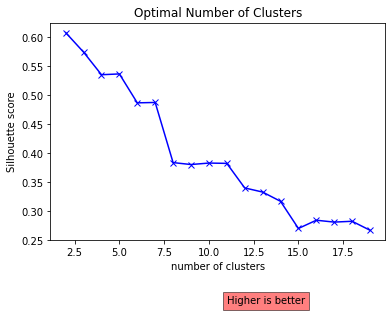

In [20]:
# Question 27: Next, let's perform a Silhouette analysis and see if it agrees with the CH criterion. 
#Once again, calculate a silhouette score for KMeans models with n number of clusters = 2 though 20 with a 
#random seed = 12345. Plot the results. What is the optimal number of clusters?

import plotly.express as px
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial import distance as sdist


si_score = []
for n in range(2, 20):
    kmeans = KMeans(n, random_state=12345).fit(og_df)
    si_score.append(silhouette_score(og_df, kmeans.labels_))

plt.plot(range(2, 20), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [21]:
# Question 28: Generate a KMeans model using two clusters and a random seed of 12345. Add the assigned clusters as a 
#new column in DataFrame.

# Which cluster has the most assigned cases? 

kmeans = KMeans(2, random_state=12345).fit(og_df)
df_wcluster = og_df.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster['cluster'].value_counts()

1    1108
0     340
Name: cluster, dtype: int64

In [22]:
#Question 29: Create a new DataFrame that displays the means of each feature seperately for the cases assigned both clusters (just like the example in the book). Which features played the largest role in determining clusters? Copy and paste the full name below exactly as it appears.

output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['cluster']).sort_values(by=['diff'], ascending=False)

,C0_means,C1_means,diff
tot_cur_bal,345798.835294,64577.304152,281221.531142
annual_inc,114448.706235,69371.264323,45077.441912
total_rev_hi_lim,35703.229412,21530.128159,14173.101253
revol_bal,18898.582353,9027.899819,9870.682533
loan_amnt,16962.279412,12356.904332,4605.375080
total_pymnt,11913.097759,8587.759865,3325.337895
total_rec_prncp,9200.140676,6563.432942,2636.707734
total_rec_int,2612.216706,1916.028646,696.188060
tot_coll_amt,260.755882,534.294224,273.538341
installment,514.122529,384.989170,129.133360


In [23]:
#Question 30: What is the predicted/assigned cluster for a new loan with the following values:? 
#[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 
#0.12, 0.05]

prediction = kmeans.predict([[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]])[0]
print(f'Predicted to be in cluster: {prediction}')


Predicted to be in cluster: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
